# Agglomerative Clustering

- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
- Take a look at https://stats.stackexchange.com/questions/195446/choosing-the-right-linkage-method-for-hierarchical-clustering

* 💡 Agglomerative clustering is a **bottom-up approach** to clustering.
    * We first divide **each instance into its own cluster** and **merge them into couples** based on a similarity metric.
    * Subsequently we compute the **similarity** again and **merge the couples into bigger groups** (clusters).
    * These groups are then merged into the bigger ones **till there is only a one big group containing all the instances present at the top**.

### 🚀 **We don't have to know the number of clusters beforehand.**  
* 💡 We can perform the whole clustering process and **select the appropriate number of clusters afterward** based on the obtained results. 
* We usually use the **dendrogram** for the distance threshold estimation.

## 🔎 You may ask how is the similarity among groups computed. 
* 💡 **Similarity is pretty hard to define.**
* There are various ways how we can compute the value called **Linkage**.

## 💡 Linkage variants
- **Maximum or Complete linkage**:
    - The distance between two clusters is defined as the maximum value of all pairwise distances between the elements in cluster 1 and the elements in cluster 2.
    - It tends to produce more compact clusters.
    - It is less prone to outliers than Single linkage.
    - Complete linkage methods tend to break large clusters.


- **Minimum or Single linkage**:
    - The distance between two clusters is defined as the minimum value of all pairwise distances between the elements in cluster 1 and the elements in cluster 2.
    - It tends to produce long, “loose” clusters.
    - Single linkage method is prone to "chain" and form clusters of irregular, often thread-like curved shapes.
        - The reason for that is obvious. With this method, at any step, **two clusters are merged if their closest edges are close enough**.
        - No proximity between other parts of the two clusters is taken into consideration.


- **Mean or Average linkage**:
    - The distance between two clusters is defined as the average distance between the elements in cluster 1 and the elements in cluster 2.

![img1](https://github.com/lowoncuties/VSB-FEI-Machine-Learning-Exercises/blob/main/images/ml_03_linkages.png?raw=true)


## Metrics
![img2](https://github.com/lowoncuties/VSB-FEI-Machine-Learning-Exercises/blob/main/images/ml_03_euclid.png?raw=true)

![img3](https://github.com/lowoncuties/VSB-FEI-Machine-Learning-Exercises/blob/main/images/ml_03_manhattan.png?raw=true)



## Imports

In [1]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
import csv
from matplotlib import pyplot as plt
import math
from sklearn.metrics import pairwise


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\jirka\miniconda3\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\jirka\miniconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\jirka\miniconda3\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start()
  File "C:\Users\jirka\miniconda3\Lib\site-

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\jirka\miniconda3\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\jirka\miniconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\jirka\miniconda3\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start()
  File "C:\Users\jirka\miniconda3\Lib\site-

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



## Load files

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/lowoncuties/VSB-FEI-Machine-Learning-Exercises/master/datasets/ml_03/clusters3.csv', sep=';', names=["x","y"])
df

,x,y
0,-8.904622,9.340533
1,-8.854129,10.615803
2,-8.750245,10.174964
3,-7.242460,9.180114
4,-7.314041,7.264030
...,...,...
295,-4.294379,0.827367
296,-3.137465,0.425249
297,-4.235766,1.464253
298,-3.517088,0.990882


In [14]:
from sklearn.metrics import pairwise_distances

dist_euclid = pairwise_distances(df, metric='euclidean')
dist_euclid[:5, :5]  # ukázka prvních vzdáleností

array([[0.00000000e+00, 1.27626915e+00, 8.48591193e-01, 1.66988457e+00,
        2.61568585e+00],
       [1.27626915e+00, 0.00000000e+00, 4.52913920e-01, 2.15839703e+00,
        3.68866568e+00],
       [8.48591193e-01, 4.52913920e-01, 0.00000000e+00, 1.80641633e+00,
        3.24595423e+00],
       [1.66988457e+00, 2.15839703e+00, 1.80641633e+00, 0.00000000e+00,
        1.91742117e+00],
       [2.61568585e+00, 3.68866568e+00, 3.24595423e+00, 1.91742117e+00,
        1.68587394e-07]])

In [15]:
# --- Aglomerativní shlukování (pouze pomocí NumPy) ---

import numpy as np
import matplotlib.pyplot as plt

# --- Výpočet vzdáleností ---
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

# --- Definice vzdálenosti mezi clustery ---
def single_linkage(cluster1, cluster2, distance):
    if distance == 'euclidean':
        return np.min([euclidean_distance(p1, p2) for p1 in cluster1 for p2 in cluster2])
    else:
        return np.min([manhattan_distance(p1, p2) for p1 in cluster1 for p2 in cluster2])

def complete_linkage(cluster1, cluster2, distance):
    if distance == 'euclidean':
        return np.max([euclidean_distance(p1, p2) for p1 in cluster1 for p2 in cluster2])
    else:
        return np.max([manhattan_distance(p1, p2) for p1 in cluster1 for p2 in cluster2])

# --- Hlavní funkce pro aglomerativní clustering ---
def aglomerative_clustering(data, num_clusters, linkage='single', metric='euclidean'):
    clusters = [[point] for point in data]
    
    while len(clusters) > num_clusters:
        min_distance = float('inf')
        to_merge = (0, 0)
        
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                if linkage == 'single':
                    dist = single_linkage(clusters[i], clusters[j], metric)
                elif linkage == 'complete':
                    dist = complete_linkage(clusters[i], clusters[j], metric)
                else:
                    raise ValueError("Linkage must be 'single' or 'complete'")
                
                if dist < min_distance:
                    min_distance = dist
                    to_merge = (i, j)
        
        i, j = to_merge
        clusters[i].extend(clusters[j])
        del clusters[j]
    
    return clusters

# --- Vizualizace výsledků ---
def plot_clusters(clusters):
    cmap = plt.colormaps.get_cmap('tab10')  
    for idx, cluster in enumerate(clusters):
        cluster = np.array(cluster)
        plt.scatter(cluster[:, 0], cluster[:, 1], color=cmap(idx / len(clusters)), label=f'Cluster {idx+1}')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Clusters')
    plt.legend()
    plt.show()


In [16]:
data = df[['x', 'y']].to_numpy()
num_clusters = 3

In [17]:
clusters_single = aglomerative_clustering(data, num_clusters, linkage='single')

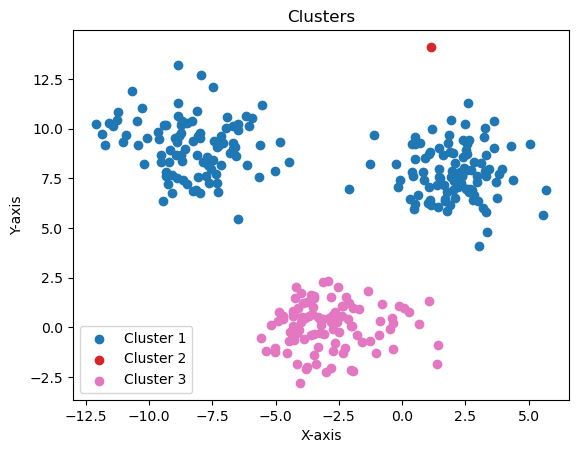

In [18]:
plot_clusters(clusters_single)

In [19]:
clusters_complete = aglomerative_clustering(data, num_clusters, linkage='complete')

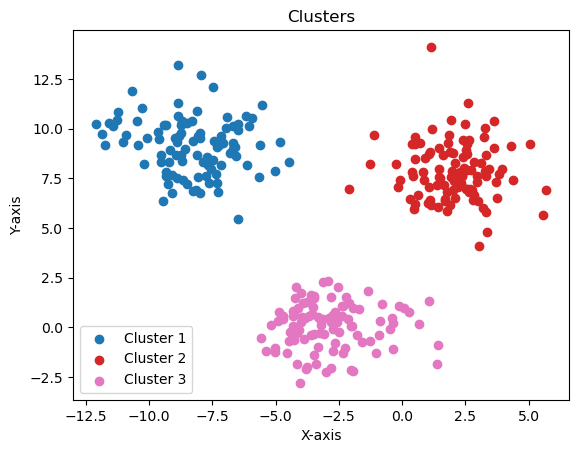

In [20]:
plot_clusters(clusters_complete)